In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


# **PROBLEM STATEMENT** :

Finex is a leading financial service provider based out of Florida, US. It offers a wide range of products and business services to customers through different channels, ranging from in-person banking and ATMs to online banking. Over the last few years, Finex has observed that a significantly large number of unauthorised transactions are being made, due to which the bank has been facing a huge revenue and profitability crisis.

We need to develop a machine learning model to detect fraudulent transactions based on the historical transactional data of customers with a pool of merchants.

This will help the company to identify the possible root causes and action areas and  to come up with a long-term solution that would help the bank generate high revenue with minimal losses.

## **Importing Libraries**

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
pd.set_option('display.max_columns', 500)

In [5]:
import datetime as dt 
import math 
from math import radians 
import calendar 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_roc_curve 
from sklearn.metrics import f1_score,recall_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE,ADASYN

##  **Step 1 : Reading and Understanding the data** 

In [6]:
df_train = pd.read_csv('/content/gdrive/MyDrive/Capstone project/capstone data/fraudTrain.csv')
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
# checking the shape of the dataset

print(df_train.shape)

(1296675, 23)


In [8]:
# checking information about various columns 

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [9]:
# Checking if  there are any missing values in the dataset 

df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

The dataset is free of any missing values.

In [10]:
#  Creating a new  dataframe with only relevant features/columns 

df_fraud_train = df_train[['trans_date_trans_time','amt','gender','lat','long','city_pop','dob','merch_lat','merch_long','is_fraud']]
df_fraud_train.head()

,trans_date_trans_time,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0
3,2019-01-01 00:01:16,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0
4,2019-01-01 00:03:06,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0


In [11]:
# Converting columns to datetime 

df_fraud_train['dob']= pd.to_datetime(df_fraud_train['dob'])

df_fraud_train['trans_date_trans_time	']= pd.to_datetime(df_fraud_train['trans_date_trans_time'])

In [12]:
# Creating a new column Trans_date and converting it to datetime 

df_fraud_train['Trans_date'] = pd.to_datetime(df_fraud_train['trans_date_trans_time	'],format='%Y:%M:%D').dt.date

df_fraud_train['Trans_date'] = pd.to_datetime(df_fraud_train['Trans_date'])

In [13]:
# Creating a new column Trans_time 


df_fraud_train['Trans_time'] = pd.DatetimeIndex(df_fraud_train['trans_date_trans_time']).hour



In [14]:
# Creating Age column

df_fraud_train['Age'] = round((df_fraud_train['Trans_date'] - df_fraud_train['dob'])/np.timedelta64(1, 'Y'))

df_fraud_train['Age'] = df_fraud_train['Age'].astype('int')

In [15]:
# checking the datatype  of columns once again

df_fraud_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   trans_date_trans_time   1296675 non-null  object        
 1   amt                     1296675 non-null  float64       
 2   gender                  1296675 non-null  object        
 3   lat                     1296675 non-null  float64       
 4   long                    1296675 non-null  float64       
 5   city_pop                1296675 non-null  int64         
 6   dob                     1296675 non-null  datetime64[ns]
 7   merch_lat               1296675 non-null  float64       
 8   merch_long              1296675 non-null  float64       
 9   is_fraud                1296675 non-null  int64         
 10  trans_date_trans_time	  1296675 non-null  datetime64[ns]
 11  Trans_date              1296675 non-null  datetime64[ns]
 12  Trans_time    

In [16]:
# Calculating Day of the week  

df_fraud_train['Day_of_week'] = df_fraud_train.Trans_date.dt.dayofweek

df_fraud_train.Day_of_week.head()  # Monday is represented by  0  and Sunday is represented by  6 .

0    1
1    1
2    1
3    1
4    1
Name: Day_of_week, dtype: int64

In [17]:
# Creating a New Month column

df_fraud_train['Month'] = df_fraud_train['Trans_date'].dt.month

df_fraud_train.Month.head()

0    1
1    1
2    1
3    1
4    1
Name: Month, dtype: int64

In [18]:
# Binary Mapping of Gender Column 

df_fraud_train['gender'] = df_fraud_train['gender'].map({'F':1,'M': 0})

In [19]:
# Creating a Function to calculate distance between customer  and merchant 


def Haversinedist(lat1,long1,lat2,long2):
  R = 6373.0
  dlat = radians(lat2-lat1)
  dlong = radians(long2-long1)
  a =  math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlong / 2)**2
  c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
  d = R*c
  return round(d,4)

In [20]:
# Calculating Distance and storing it in a new column 'Dist'

Dist = []

for p,q,r,s in zip(df_fraud_train['lat'],df_fraud_train['long'],df_fraud_train['merch_lat'],df_fraud_train['merch_long']):
  Dist.append(Haversinedist(p,q,r,s))


In [21]:
df_fraud_train['Dist']= Dist

df_fraud_train.head()

,trans_date_trans_time,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,trans_date_trans_time\t,Trans_date,Trans_time,Age,Day_of_week,Month,Dist
0,2019-01-01 00:00:18,4.97,1,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,2019-01-01 00:00:18,2019-01-01,0,31,1,1,10.5130
1,2019-01-01 00:00:44,107.23,1,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,2019-01-01 00:00:44,2019-01-01,0,41,1,1,30.1809
2,2019-01-01 00:00:51,220.11,0,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,2019-01-01 00:00:51,2019-01-01,0,57,1,1,107.7801
3,2019-01-01 00:01:16,45.00,0,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,2019-01-01 00:01:16,2019-01-01,0,52,1,1,97.6600
4,2019-01-01 00:03:06,41.96,0,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,2019-01-01 00:03:06,2019-01-01,0,33,1,1,66.2568


In [22]:
# Dropping the unnecessary columns

df_fraud_train.drop(['trans_date_trans_time','lat','long','dob','merch_lat','merch_long','trans_date_trans_time\t'],axis=1,inplace=True)

df_fraud_train.head()

,amt,gender,city_pop,is_fraud,Trans_date,Trans_time,Age,Day_of_week,Month,Dist
0,4.97,1,3495,0,2019-01-01,0,31,1,1,10.5130
1,107.23,1,149,0,2019-01-01,0,41,1,1,30.1809
2,220.11,0,4154,0,2019-01-01,0,57,1,1,107.7801
3,45.00,0,1939,0,2019-01-01,0,52,1,1,97.6600
4,41.96,0,99,0,2019-01-01,0,33,1,1,66.2568


## **STEP 2 :  Exploratory Data Analysis**

### 2.1 Checking Data Imbalance




In [23]:
classes = df_fraud_train['is_fraud'].value_counts()
normal_share = classes[0]/df_fraud_train['is_fraud'].count()*100
fraud_share = classes [1]/df_fraud_train['is_fraud'].count()*100

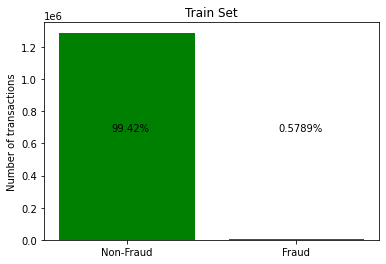

In [24]:
plt.bar(['Non-Fraud','Fraud'],classes,color=['g','r'])
plt.ylabel('Number of transactions')
plt.title('Train Set')
plt.annotate("{0:.4}%".format(normal_share),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share),(0.7, 0.5), xycoords='axes fraction')
plt.show()

* The above Bar chart clearly shows there is imbalance in the target variable which needs to  be handled by sampling methods

### 2.2 Gender Distribution in the dataset

In [25]:
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

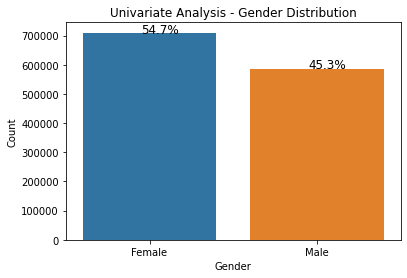

In [26]:
x=['Female','Male']
y= [df_fraud_train.gender.value_counts()[1],df_fraud_train.gender.value_counts()[0]]
ax = sns.barplot(x=x,y=y)

plt.xlabel('Gender',size=10)
plt.ylabel('Count',size=10)

plt.title('Univariate Analysis - Gender Distribution')

without_hue(ax,df_fraud_train.gender)

* Clearly the percentage of Female credit card holders is more than the Male.
* It can be concluded that women are involved in more number of transactions and
  hence more prone to frauds.



### 2.3 Checking if there is any skewness in the dataset

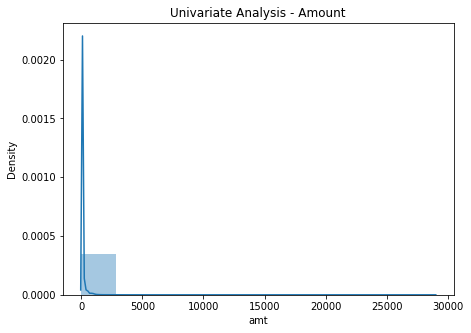

In [27]:
## Checking the 'amt' column 

plt.figure(figsize=[7,5])

sns.distplot(df_fraud_train['amt'],bins=10,kde=True)

plt.title('Univariate Analysis - Amount')
plt.show()

The kernel density function shows major skewness in the amount column. Hence, we shall treat the amount column with log transformations.

In [28]:
df_fraud_train['amt'] = np.log(df_fraud_train['amt'])

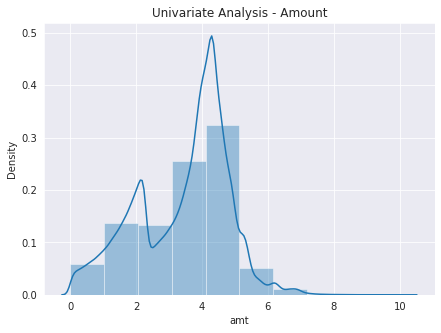

In [29]:
plt.figure(figsize=[7,5])

sns.set_style("darkgrid")
sns.distplot(df_fraud_train['amt'],bins=10,kde=True)

plt.title('Univariate Analysis - Amount')
plt.show()

* Skewness is treated.

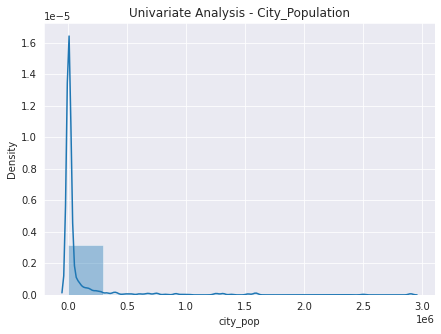

In [30]:
## Checking the 'city_pop' column 

plt.figure(figsize=[7,5])


sns.distplot(df_fraud_train['city_pop'],bins=10,kde=True)

plt.title('Univariate Analysis - City_Population')
plt.show()

* The Kernel density function shows major skewness in City_pop column. Hence , we  need to treat  the skewness with log transformation.

In [31]:
df_fraud_train['city_pop']= np.log(df_fraud_train['city_pop'])

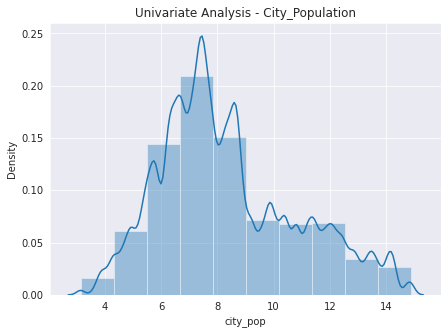

In [32]:
## After treating skewness with log transformation

plt.figure(figsize=[7,5])

sns.distplot(df_fraud_train['city_pop'],bins=10,kde=True)

plt.title('Univariate Analysis - City_Population')
plt.show()

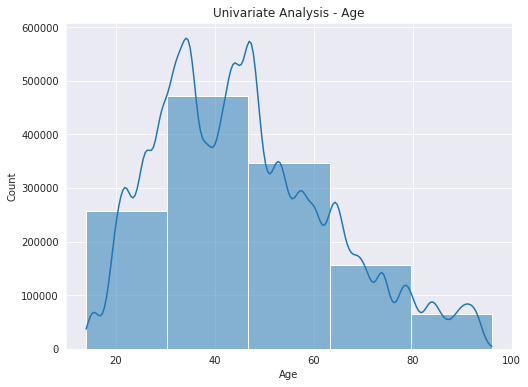

In [33]:
# Univariate analysis of Age column 
plt.figure(figsize=[8,6])

sns.histplot(data=df_fraud_train,x='Age',bins = 5,kde=True)
plt.title('Univariate Analysis - Age')
plt.show()

*  There is No Skewness in Age Column. Also, most of  the credit card holders belonged to age group  30-45.
* Most number of Transactions is done by people in the age group 30-45. This is followed by people in age group 46-60 who have also done significant number of Transactions.

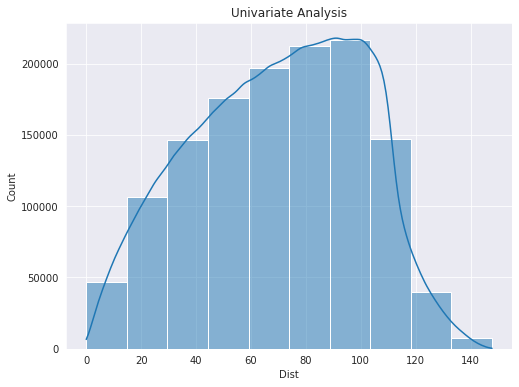

In [34]:
# Univariate analysis of Dist column

plt.figure(figsize=[8,6])

sns.histplot(data=df_fraud_train,x='Dist',bins=10,kde=True)

plt.title('Univariate Analysis')

plt.show()

* Clearly there is no major skewness in the Dist Column.

### 2.4 Univariate and  Bivariate Analysis

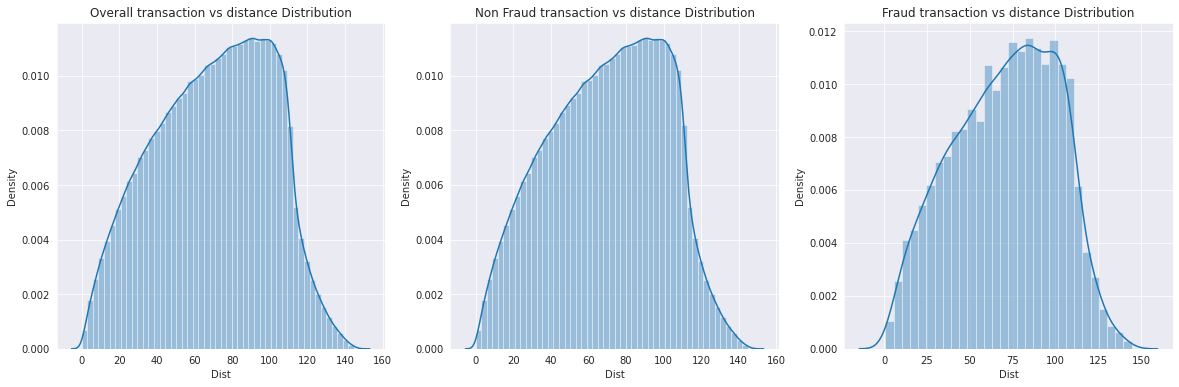

In [35]:
## Transaction vs Distance Distribution 

fig,ax = plt.subplots(1,3,figsize=(20,6))

sns.distplot(df_fraud_train['Dist'],ax=ax[0],kde=True)
sns.distplot(df_fraud_train[(df_fraud_train['is_fraud']==0)]['Dist'],ax=ax[1],kde=True)
sns.distplot(df_fraud_train[(df_fraud_train['is_fraud']==1)]['Dist'],ax=ax[2],kde=True)


ax[0].set_title('Overall transaction vs distance Distribution')
ax[1].set_title('Non Fraud transaction vs distance Distribution')
ax[2].set_title('Fraud transaction vs distance Distribution')

plt.show()


* Most of the Non-Fraudulent transactions occur in distance range of 70-105 kms.
* Most of the Fraudlent Transactions occur in distance range of 75 -100 kms.

*  Since there is very less difference in the  transaction vs distance distribution of fraudlent and non-fraudlent transactions, it is hard to identify fradulent transactions on the basis of distance.

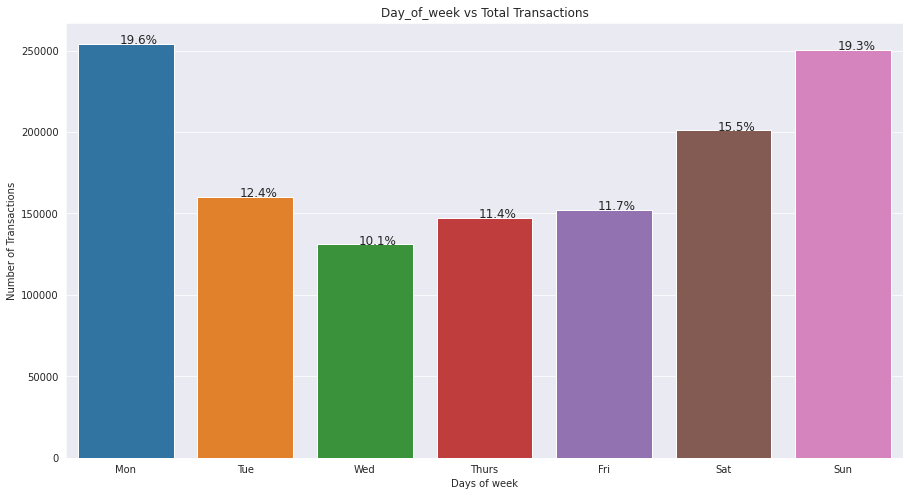

In [36]:
#  Distribution of Transaction vs Day_of_week 

fraud = df_fraud_train[(df_fraud_train['is_fraud']==1)] # Fraud df

non_fraud = df_fraud_train[(df_fraud_train['is_fraud']== 0)] 

plt.figure(figsize=[15,8])

ax= sns.countplot(df_fraud_train['Day_of_week'])

for p in ax.patches:
        total = len(df_fraud_train['is_fraud'])
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

week = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']   
x_ticks = [0,1,2,3,4,5,6]
ax.set_title('Day_of_week vs Total Transactions')
ax.set_ylabel('Number of Transactions')
ax.set_xlabel('Days of week')
ax.set_xticks(x_ticks)
ax.set_xticklabels(week)
plt.show()

* Most of the transactions occur on Monday followed by Sunday.



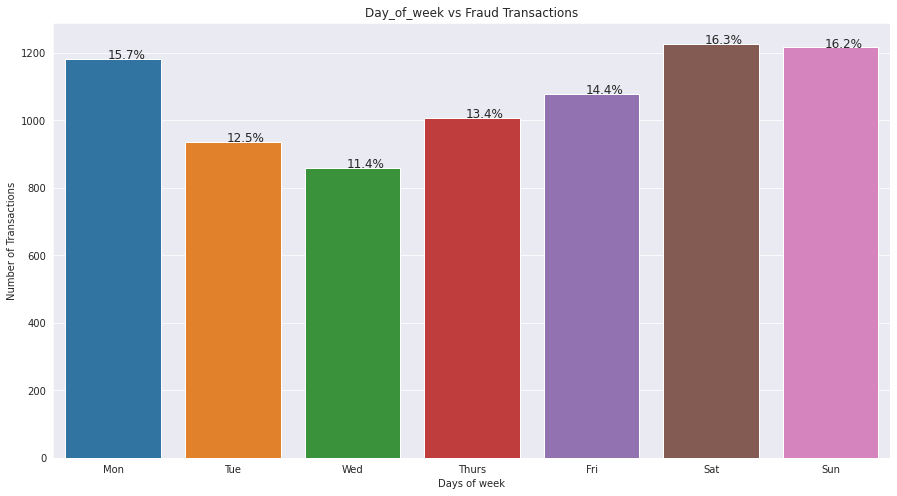

In [37]:
# Distribution of Fraudlent Transaction vs Day_of_week  

fraud = df_fraud_train[(df_fraud_train['is_fraud']==1)] # Fraud df

non_fraud = df_fraud_train[(df_fraud_train['is_fraud']== 0)] 

plt.figure(figsize=[15,8])

ax= sns.countplot(fraud['Day_of_week'])

for p in ax.patches:
        total = len(fraud['is_fraud'])
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

week = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']   
x_ticks = [0,1,2,3,4,5,6]
ax.set_title('Day_of_week vs Fraud Transactions')
ax.set_ylabel('Number of Transactions')
ax.set_xlabel('Days of week')
ax.set_xticks(x_ticks)
ax.set_xticklabels(week)
plt.show()

* In a week , More Fraudlent transactions occur on Saturdays and Sundays as compared to weekdays.

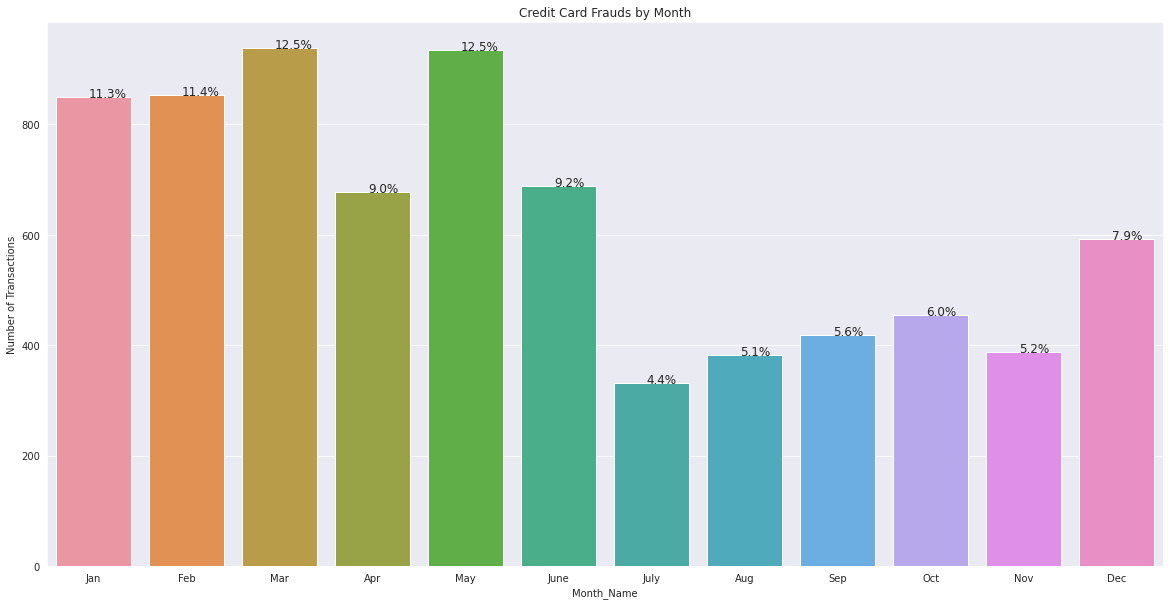

In [38]:
#  Distribution of Credit Card Frauds by Month 

fraud = df_fraud_train[(df_fraud_train['is_fraud']==1)] # Fraud df

non_fraud = df_fraud_train[(df_fraud_train['is_fraud']== 0)] 

plt.figure(figsize=[20,10])

ax= sns.countplot(fraud['Month'])

for p in ax.patches:
        total = len(fraud['is_fraud'])
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)


x_ticks = [0,1,2,3,4,5,6,7,8,9,10,11]
month_name = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']

ax.set_title('Credit Card Frauds by Month')
ax.set_ylabel('Number of Transactions')
ax.set_xlabel('Month_Name')

ax.set_xticks(x_ticks)
ax.set_xticklabels(month_name)

plt.show()

* Most of the Credit card Frauds occur in the Months of Mar and May followed by Jan , Feb  .

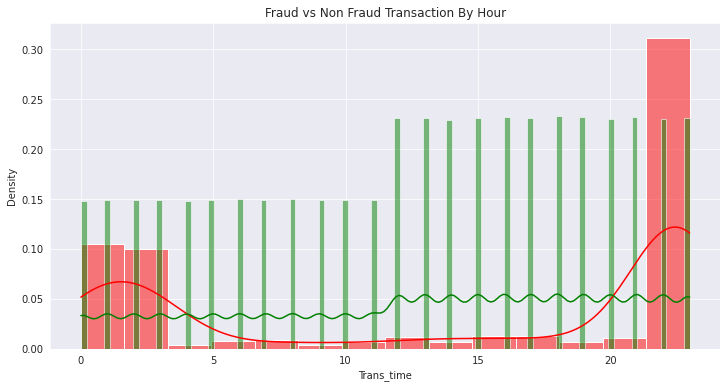

In [39]:
#  Fraud vs Normal Transaction  by Hour 

fraud = df_fraud_train[(df_fraud_train['is_fraud']==1)] # Fraud df

non_fraud = df_fraud_train[(df_fraud_train['is_fraud']== 0)] 

plt.figure(figsize=[12,6])

sns.histplot(fraud['Trans_time'],color='red',stat='density',kde=True)
sns.histplot(non_fraud['Trans_time'],color='green',stat='density',kde=True)

plt.title('Fraud vs Non Fraud Transaction By Hour')

plt.show()

* We can see that  the fraudlent transactions are more frequent  at late nights (after 22:00 Hrs) and early mornings (3:00 Hrs).

* While the non fraudlent transactions occur at all the times and more significantly in the day time.


## **STEP 4 : Train/Test Data Splitting:**

In [40]:
df_fraud_train.columns

Index(['amt', 'gender', 'city_pop', 'is_fraud', 'Trans_date', 'Trans_time',
       'Age', 'Day_of_week', 'Month', 'Dist'],
      dtype='object')

In [41]:
# Dropping Unnecessary columns 

df_fraud_train.drop(['Trans_date','Trans_time'],axis=1,inplace=True)

In [42]:
# Train/Test Splitting 

X = df_fraud_train.drop('is_fraud',axis=1)

y = df_fraud_train['is_fraud'] # Target Variable


In [43]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test= train_test_split(X,y,stratify=y,random_state=42)

* We are using Stratify method to handle the data imbalance.
* Stratification ensures that each fold is a representative of all the strata of the data.

In [44]:
X_train.shape,X_test.shape

((972506, 7), (324169, 7))

In [45]:
# Scaling the varibles for logistic regression 

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_lg =X_train.copy() # Creating a copy of X_train for scaling purpose for logistic regression model only


In [46]:
X_train_lg[['amt','city_pop','Age','Dist']]=scaler.fit_transform(X_train_lg[['amt','city_pop','Age','Dist']])

X_train_lg.head()

,amt,gender,city_pop,Age,Day_of_week,Month,Dist
267436,1.060414,0,0.019868,-0.172278,6,5,-0.474126
233159,-0.640691,1,-1.026244,0.345107,5,4,0.815801
430072,0.760320,0,0.125083,0.805005,4,7,1.187608
236662,1.003862,1,1.216204,0.115158,6,4,0.175655
450357,0.911623,0,0.158399,2.127211,4,7,0.325061


In [47]:
# lets'check if scaling worked using describe method 

X_train_lg.describe().applymap('{:,.2f}'.format)

,amt,gender,city_pop,Age,Day_of_week,Month,Dist
count,"972,506.00","972,506.00","972,506.00","972,506.00","972,506.00","972,506.00","972,506.00"
mean,-0.00,0.55,0.00,0.00,3.07,6.14,-0.00
std,1.00,0.50,1.00,1.00,2.20,3.42,1.00
min,-2.49,0.00,-2.13,-1.84,0.00,1.00,-2.30
25%,-0.86,0.00,-0.71,-0.75,1.00,3.00,-0.77
50%,0.29,1.00,-0.23,-0.11,3.00,6.00,0.07
75%,0.69,1.00,0.64,0.63,5.00,9.00,0.81
max,4.87,1.00,2.66,2.87,6.00,12.00,2.55


In [48]:
y_train.value_counts()

0    966877
1      5629
Name: is_fraud, dtype: int64

## **STEP 5 : Model Building and Hyperparameter Tuning**


We would use the following algorithms to develop the classification models which would help in detecting fraudulent transactions are : 

* Logistic Regression 
* Decision Tree 
* Random Forest 
* XGBoost

Since there is imbalance in the dataset , so we will mitigate this imbalance using sampling techniques like SMOTE and ADASYN.

## Building Baseline Linear Model

#### Evaluation Metric

A fraud detection system aims at optimizing two conflicting goals :     

*  On the one hand, the system should maximize the detection of fraudulent transactions, a metric known as recall.

*  On the other hand, it should also minimize the number of false positives, that is, the number of genuine transactions which are incorrectly predicted as frauds.



What we are looking for : **High recall and low false positive rate**

The area under the ROC curve (known as **AUC ROC**) is the most widely used metric to assess the performance of fraud detection systems with imbalanced Data. 



So, We have to focus on **High AUC and High recall** in order to detect actual fraudulent transactions.

### 5.1 Logistic Regression - Imbalanced

In [49]:
lg_imbalanced = LogisticRegression(random_state=42).fit(X_train_lg,y_train)

### Hyperparameter Tuning using Grid Search CV

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
params_lg = {'C':[0.01,0.1,0.5,1,2,3,4,10],
             'penalty':['l1','l2']}

grid_search_lg = GridSearchCV(estimator=lg_imbalanced,
                              param_grid=params_lg,
                              cv=5,
                              n_jobs=-1,verbose=1,
                              scoring='recall')

In [52]:
%%time 
grid_search_lg.fit(X_train_lg,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
CPU times: user 5.67 s, sys: 3.2 s, total: 8.86 s
Wall time: 1min 25s


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1, 2, 3, 4, 10],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [53]:
grid_search_lg.best_score_

0.0

In [54]:
# Creating a Function for evaluating the model 

def evaluate_model_lg (model):
  y_train_pred = model.predict(X_train_lg)
  y_test_pred = model.predict(X_test)

  print("Train set performance")
  print("Recall : ", recall_score(y_train,y_train_pred))
  print("Confusion Matrix : ")
  print(confusion_matrix(y_train,y_train_pred))
  print("-"*30)
  
  print("Test set performance")
  print("Recall : ", recall_score(y_test,y_test_pred))
  print("Confusion Matrix : ")
  print(confusion_matrix(y_test,y_test_pred))


In [55]:
# evaluating model using best parameter values
 
model_lg_imbalanced = grid_search_lg.best_estimator_

evaluate_model_lg(model_lg_imbalanced)

Train set performance
Recall :  0.0
Confusion Matrix : 
[[966634    243]
 [  5629      0]]
------------------------------
Test set performance
Recall :  1.0
Confusion Matrix : 
[[  1427 320865]
 [     0   1877]]


* Since the data imbalance hasn't been mitigated, the model predicts almost all the transactions as 'not fraud'.

* Hence we need to balance the classes in target variable in order to build a decent model


#### ROC Curve 

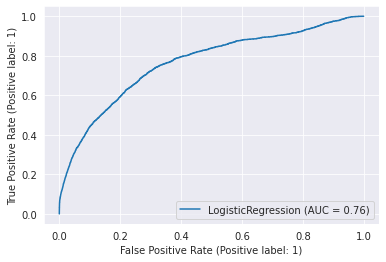

In [158]:
# Let's plot the roc curve and check AUC score 

plot_roc_curve(model_lg_imbalanced,X_test,y_test)

### 5.1.1 Logistic Regression - SMOTE 

In [57]:
X_train_lg_smote,y_train_lg_smote = SMOTE().fit_resample(X_train_lg,y_train)

In [58]:
lg_smote = LogisticRegression().fit(X_train_lg_smote,y_train_lg_smote)

In [59]:
params_lg = {'C':[0.01,0.1,0.5,1,2,3,4,10],
             'penalty':['l1','l2']}

grid_search_lg_smote = GridSearchCV(estimator=lg_smote,
                              param_grid=params_lg,
                              cv=5,
                              n_jobs=-1,verbose=1,
                              scoring='recall')

In [60]:
%%time 
grid_search_lg_smote.fit(X_train_lg_smote,y_train_lg_smote)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
CPU times: user 9.15 s, sys: 3.05 s, total: 12.2 s
Wall time: 2min 34s


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1, 2, 3, 4, 10],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [61]:
grid_search_lg_smote.best_score_

0.7757170776372007

In [62]:
# Creating a Function for evaluating the model 

def evaluate_model_lg_smote (model):
  y_train_pred = model.predict(X_train_lg_smote)
  y_test_pred = model.predict(X_test)

  print("Train set performance")
  print("Recall : ", recall_score(y_train_lg_smote,y_train_pred))
  print("Confusion Matrix : ")
  print(confusion_matrix(y_train_lg_smote,y_train_pred))
  print("-"*30)
  
  print("Test set performance")
  print("Recall : ", recall_score(y_test,y_test_pred))
  print("Confusion Matrix : ")
  print(confusion_matrix(y_test,y_test_pred))

In [63]:
model_lg_smote = grid_search_lg_smote.best_estimator_ 
evaluate_model_lg_smote(model_lg_smote)

Train set performance
Recall :  0.7757191452480512
Confusion Matrix : 
[[767370 199507]
 [216852 750025]]
------------------------------
Test set performance
Recall :  1.0
Confusion Matrix : 
[[     0 322292]
 [     0   1877]]


#### ROC curve

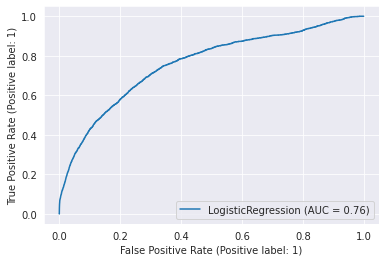

In [159]:
# Let's plot the roc curve and check AUC score 

plot_roc_curve(model_lg_smote,X_test,y_test)

#### Logistic Regression SMOTE - Metrics :     

* Train Recall :  0.77
* Test Recall : 1.0 
* AUC    :   0.76

### 5.1.2  Logistic Regression  - ADASYN

In [65]:
X_train_lg_ada,y_train_lg_ada = ADASYN().fit_resample(X_train_lg,y_train)

In [66]:
lg_ada = LogisticRegression().fit(X_train_lg_ada,y_train_lg_ada)

In [67]:
params_lg = {'C':[0.01,0.1,0.5,1,2,3,4,10],
             'penalty':['l1','l2']}

grid_search_lg_ada = GridSearchCV(estimator=lg_ada,
                              param_grid=params_lg,
                              cv=5,
                              n_jobs=-1,verbose=1,
                              scoring='recall')

In [68]:
%%time 
grid_search_lg_ada.fit(X_train_lg_ada,y_train_lg_ada)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
CPU times: user 7.44 s, sys: 2.2 s, total: 9.64 s
Wall time: 2min 20s


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1, 2, 3, 4, 10],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [69]:
grid_search_lg_ada.best_score_

0.7191255056520398

In [70]:
# Creating a Function for evaluating the model 

def evaluate_model_lg_ada (model):
  y_train_pred = model.predict(X_train_lg_ada)
  y_test_pred = model.predict(X_test)

  print("Train set performance")
  print("Recall : ", recall_score(y_train_lg_ada,y_train_pred))
  print("Confusion Matrix : ")
  print(confusion_matrix(y_train_lg_ada,y_train_pred))
  print("-"*30)
  
  print("Test set performance")
  print("Recall : ", recall_score(y_test,y_test_pred))
  print("Confusion Matrix : ")
  print(confusion_matrix(y_test,y_test_pred))

In [71]:
model_lg_ada = grid_search_lg_ada.best_estimator_ 
evaluate_model_lg_ada(model_lg_ada)

Train set performance
Recall :  0.7191017164304949
Confusion Matrix : 
[[705476 261401]
 [271516 695083]]
------------------------------
Test set performance
Recall :  1.0
Confusion Matrix : 
[[     0 322292]
 [     0   1877]]


#### ROC curve 

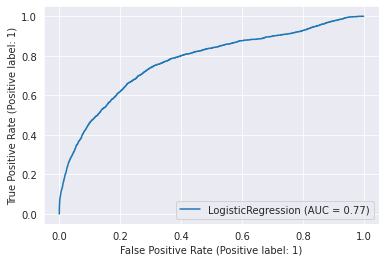

In [160]:
# Let's plot the roc curve and check AUC score 

plot_roc_curve(model_lg_ada,X_test,y_test)

#### Logistic Regression ADASYN - Metrics :     

* Train Recall :  0.71
* Test Recall : 1.0 
* AUC    :   0.77

### 5.2 Decision Tree Classifier - Imbalanced 

In [73]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree

In [74]:
# Creating a Function for evaluating the model 

def evaluate_model_imbalanced (model):
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  print("Train set performance")
  print("Recall : ", recall_score(y_train,y_train_pred))
  print("Confusion Matrix : ")
  print(confusion_matrix(y_train,y_train_pred))
  print("-"*30)
  
  print("Test set performance")
  print("Recall : ", recall_score(y_test,y_test_pred))
  print("Confusion Matrix : ")
  print(confusion_matrix(y_test,y_test_pred))

### Hyperparameter Tuning using Grid Search CV

In [75]:
dt_imbalanced = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)

In [76]:
# Creating the parameter grid based on results of random search 

params = { 
    'max_depth':[3,5,7,9,11],
    'min_samples_leaf':[50,60,70,80,90,100,120],
    'max_features':[5,8,12,15],
    'criterion':['gini']
}


grid_search_dt = GridSearchCV(estimator = dt_imbalanced,
                              param_grid=params,
                              cv=5,
                              n_jobs=-1,verbose=-1,
                              scoring='recall')

In [77]:
%%time
grid_search_dt.fit(X_train,y_train)


CPU times: user 15.7 s, sys: 6.28 s, total: 21.9 s
Wall time: 7min 18s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 7, 9, 11],
                         'max_features': [5, 8, 12, 15],
                         'min_samples_leaf': [50, 60, 70, 80, 90, 100, 120]},
             scoring='recall', verbose=-1)

In [78]:
grid_search_dt.best_score_

0.33647081113084665

In [79]:
model_dt = grid_search_dt.best_estimator_ 
model_dt

DecisionTreeClassifier(max_depth=11, max_features=5, min_samples_leaf=50,
                       random_state=42)

In [80]:
evaluate_model_imbalanced(model_dt)

Train set performance
Recall :  0.3512169124178362
Confusion Matrix : 
[[966151    726]
 [  3652   1977]]
------------------------------
Test set performance
Recall :  0.31326584976025573
Confusion Matrix : 
[[322004    288]
 [  1289    588]]


#### ROC curve 

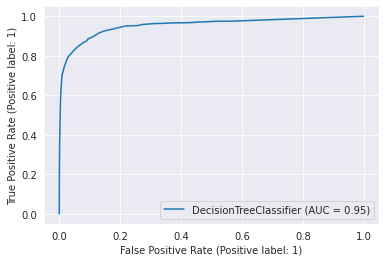

In [161]:
plot_roc_curve(model_dt,X_test,y_test)

#### Decison Tree Imbalanced - Metrics:

* Train Recall :  0.35 
* Test Recall  :  0.31 
* AUC          : 0.95

From the above Decision Tree Metrics we can see that decision trees cannot handle imbalanced data efficiently which is evident in the low recall score.

### 5.2.1 Decision Tree - SMOTE

In [82]:
X_train_smote,y_train_smote = SMOTE().fit_resample(X_train,y_train)

In [83]:
dt_smote = DecisionTreeClassifier(random_state=42).fit(X_train_smote,y_train_smote)

In [84]:
# Creating a Function for evaluating the model 

def evaluate_model_smote(model):
  y_train_pred = model.predict(X_train_smote)
  y_test_pred = model.predict(X_test)

  print("Train set performance")
  print("Recall : ", recall_score(y_train_smote,y_train_pred))
  print("Confusion Matrix : ")
  print(confusion_matrix(y_train_smote,y_train_pred))
  print("-"*30)
  
  print("Test set performance")
  print("Recall : ", recall_score(y_test,y_test_pred))
  print("Confusion Matrix : ")
  print(confusion_matrix(y_test,y_test_pred))

### Hyperparameter Tuning using Grid Search CV

In [85]:
# Creating the parameter grid based on results of random search 

params = { 
    'max_depth':[3,5,7,9,11],
    'min_samples_leaf':[50,60,70,80,90,100,120],
    'max_features':[5,8,12,15],
    'criterion':['gini']
}


grid_search_dt_smote = GridSearchCV(estimator = dt_smote,
                              param_grid=params,
                              cv=5,
                              n_jobs=-1,verbose=-1,
                              scoring='recall')

In [86]:
%%time 
grid_search_dt_smote.fit(X_train_smote,y_train_smote)

CPU times: user 26.5 s, sys: 1.29 s, total: 27.8 s
Wall time: 16min


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 7, 9, 11],
                         'max_features': [5, 8, 12, 15],
                         'min_samples_leaf': [50, 60, 70, 80, 90, 100, 120]},
             scoring='recall', verbose=-1)

In [87]:
grid_search_dt_smote.best_score_

0.8633942042757352

In [88]:
model_dt_smote = grid_search_dt_smote.best_estimator_ 

model_dt_smote

DecisionTreeClassifier(max_depth=11, max_features=5, min_samples_leaf=80,
                       random_state=42)

In [89]:
evaluate_model_smote(model_dt_smote)

Train set performance
Recall :  0.8619090122114809
Confusion Matrix : 
[[895016  71861]
 [133517 833360]]
------------------------------
Test set performance
Recall :  0.8087373468300479
Confusion Matrix : 
[[298143  24149]
 [   359   1518]]


#### ROC Curve

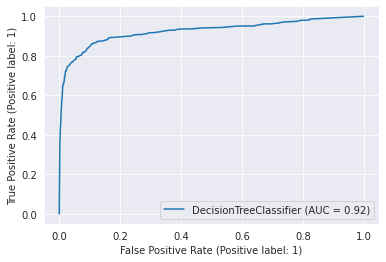

In [90]:
plot_roc_curve(model_dt_smote,X_test,y_test)

#### Decision Tree SMOTE - Metrics :      

* Train Recall :  0.86 
* Test  Recall :  0.81 
* AUC          :  0.92 

From above, it can be observed that SMOTE sampling method for balancing the dataset is quite efficient. This is reflected by the improved Recall and AUC values.

### 5.2.2 Decision Tree - ADASYN 

In [91]:
X_train_ada,y_train_ada = ADASYN().fit_resample(X_train,y_train)

In [92]:
# Creating a Function for evaluating the model 

def evaluate_model_ada(model):
  y_train_pred = model.predict(X_train_ada)
  y_test_pred = model.predict(X_test)

  print("Train set performance")
  print("Recall : ", recall_score(y_train_ada,y_train_pred))
  print("Confusion Matrix : ")
  print(confusion_matrix(y_train_ada,y_train_pred))
  print("-"*30)
  
  print("Test set performance")
  print("Recall : ", recall_score(y_test,y_test_pred))
  print("Confusion Matrix : ")
  print(confusion_matrix(y_test,y_test_pred))

In [93]:
dt_ada = DecisionTreeClassifier(random_state=42).fit(X_train_ada,y_train_ada)

### Hyperparameter Tuning Using Grid Search CV

In [94]:
# creating the parameter grid using the one finalised in Decision Tree SMOTE model 

params = { 
    'max_depth':[9,11],
    'min_samples_leaf':[90,100],
    'max_features':[5,7],
    'criterion':['gini']
}


grid_search_dt_ada = GridSearchCV(estimator = dt_ada,
                              param_grid=params,
                              cv=5,
                              n_jobs=-1,verbose=-1,
                              scoring='recall')

In [95]:
%%time

grid_search_dt_ada.fit(X_train_ada,y_train_ada)


CPU times: user 16.1 s, sys: 565 ms, total: 16.7 s
Wall time: 4min 48s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [9, 11],
                         'max_features': [5, 7],
                         'min_samples_leaf': [90, 100]},
             scoring='recall', verbose=-1)

In [96]:
grid_search_dt_ada.best_score_

0.8503231021902279

In [97]:
model_dt_ada = grid_search_dt_ada.best_estimator_
model_dt_ada

DecisionTreeClassifier(max_depth=11, max_features=5, min_samples_leaf=100,
                       random_state=42)

In [98]:
evaluate_model_ada(model_dt_ada)

Train set performance
Recall :  0.864759307094932
Confusion Matrix : 
[[885245  81632]
 [131098 838270]]
------------------------------
Test set performance
Recall :  0.8305807139051679
Confusion Matrix : 
[[294694  27598]
 [   318   1559]]


#### ROC Curve

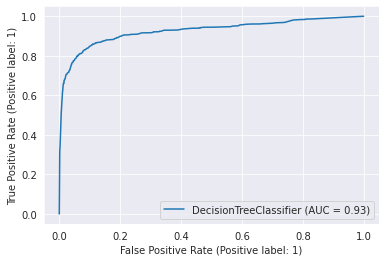

In [99]:
plot_roc_curve(model_dt_ada,X_test,y_test)

#### Decision Tree ADASYN -  Metrics :     

* Train Recall :  0.857 
* Test Recall  :  0.827 

* AUC          :  0.93



### 5.3  Random Forest -  Imbalanced 

In [100]:
from sklearn.ensemble import RandomForestClassifier 

In [101]:
rf_imbalanced = RandomForestClassifier(random_state=42).fit(X_train,y_train)

### Hyperparamter Tuning Using Grid Search CV

In [102]:
# creating the parameter grid using the one finalised in Decision Tree  modeland building up on that

params = { 
    'max_depth':[10,11],
    'min_samples_leaf':[90,100],
    'criterion':['gini'],
    'n_estimators' : [10,15,20]
}


grid_search_rf = GridSearchCV(estimator = rf_imbalanced,
                              param_grid=params,
                              cv=5,
                              n_jobs=-1,verbose=-1,
                              scoring='recall')

In [103]:
%%time 
grid_search_rf.fit(X_train,y_train)

CPU times: user 53.2 s, sys: 1.1 s, total: 54.3 s
Wall time: 15min 48s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [10, 11],
                         'min_samples_leaf': [90, 100],
                         'n_estimators': [10, 15, 20]},
             scoring='recall', verbose=-1)

In [104]:
 model_rf = grid_search_rf.best_estimator_ 

 model_rf

RandomForestClassifier(max_depth=10, min_samples_leaf=100, n_estimators=20,
                       random_state=42)

In [105]:
evaluate_model_imbalanced(model_rf)

Train set performance
Recall :  0.20731923965180316
Confusion Matrix : 
[[966576    301]
 [  4462   1167]]
------------------------------
Test set performance
Recall :  0.1816728822589238
Confusion Matrix : 
[[322180    112]
 [  1536    341]]


In [106]:
grid_search_rf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 100,
 'n_estimators': 20}

#### ROC Curve 

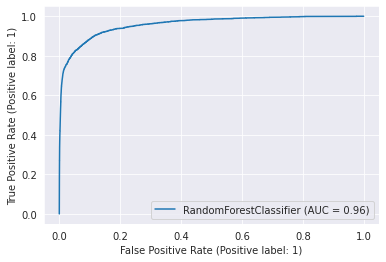

In [162]:
plot_roc_curve(model_rf,X_test,y_test)

#### Random Forest Imbalanced - Metrics :    

* Train Recall :   0.20
* Test Recall :    0.18 
* AUC      : 0.96 

### 5.3.1 Random Forest - SMOTE 

In [108]:
rf_smote  =  RandomForestClassifier(random_state=42).fit(X_train_smote,y_train_smote)

In [109]:
# creating the parameter grid using the one finalised in Decision Tree  modeland building up on that

params = { 
    'max_depth':[10,11],
    'min_samples_leaf':[90,100],
    'criterion':['gini'],
    'n_estimators' : [10,15,20]
}


grid_search_rf_smote = GridSearchCV(estimator = rf_smote,
                              param_grid=params,
                              cv=5,
                              n_jobs=-1,verbose=-1,
                              scoring='recall')

In [110]:
%%time 

grid_search_rf_smote.fit(X_train_smote,y_train_smote)

CPU times: user 1min 29s, sys: 1.71 s, total: 1min 31s
Wall time: 33min 7s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [10, 11],
                         'min_samples_leaf': [90, 100],
                         'n_estimators': [10, 15, 20]},
             scoring='recall', verbose=-1)

In [111]:
model_rf_smote = grid_search_rf_smote.best_estimator_ 

model_rf_smote 

RandomForestClassifier(max_depth=11, min_samples_leaf=90, n_estimators=20,
                       random_state=42)

In [112]:
evaluate_model_smote(model_rf_smote)

Train set performance
Recall :  0.8372357600811685
Confusion Matrix : 
[[926513  40364]
 [157373 809504]]
------------------------------
Test set performance
Recall :  0.7932871603622802
Confusion Matrix : 
[[308834  13458]
 [   388   1489]]


##### ROC Curve

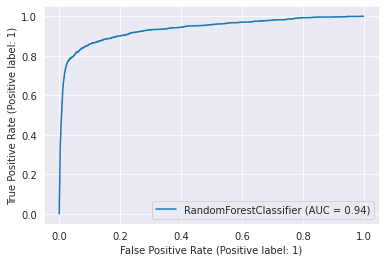

In [163]:
plot_roc_curve(model_rf_smote,X_test,y_test)

####  Random Forest SMOTE :    

* Train Recall :  0.83 
* Test  Recall :  0.79 

*  AUC :  0.94 

### 5.3.2 Random Forest - ADASYN 

In [114]:
rf_ada = RandomForestClassifier(random_state=42).fit(X_train_ada,y_train_ada)

In [115]:
# creating the parameter grid using the one finalised in Decision Tree  modeland building up on that

params = { 
    'max_depth':[10,11],
    'min_samples_leaf':[90,100],
    'criterion':['gini'],
    'n_estimators' : [10,15,20]
}


grid_search_rf_ada = GridSearchCV(estimator = rf_ada,
                              param_grid=params,
                              cv=5,
                              n_jobs=-1,verbose=-1,
                              scoring='recall')

In [116]:
%%time 

grid_search_rf_ada.fit(X_train_ada,y_train_ada)

CPU times: user 40.1 s, sys: 1.38 s, total: 41.4 s
Wall time: 29min 36s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [10, 11],
                         'min_samples_leaf': [90, 100],
                         'n_estimators': [10, 15, 20]},
             scoring='recall', verbose=-1)

In [117]:
grid_search_rf_ada.best_score_

0.8192461503713367

In [118]:
model_rf_ada = grid_search_rf_ada.best_estimator_ 
model_rf_ada


RandomForestClassifier(max_depth=11, min_samples_leaf=90, n_estimators=10,
                       random_state=42)

In [119]:
evaluate_model_ada(model_rf_ada)

Train set performance
Recall :  0.8360571011215555
Confusion Matrix : 
[[919451  47426]
 [158921 810447]]
------------------------------
Test set performance
Recall :  0.798614810868407
Confusion Matrix : 
[[306301  15991]
 [   378   1499]]


#### ROC Curve

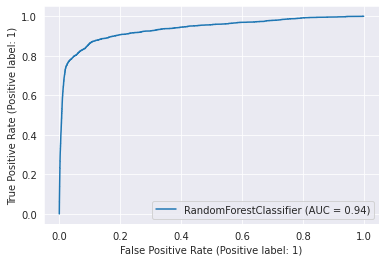

In [155]:
plot_roc_curve(model_rf_ada,X_test,y_test)

#### Random Forest ADASYN -  Metrics :      

* Train Recall :   0.83 

* Test Recall :   0.79 

* AUC  : 0.94

From  the above  it can be observed that the Random Forest Algorithm Has  yielded best results with ADASYN sampling.There ADASYN model is much more reliable for model building.

## **STEP 6 :  Reading and Preparing Unseen Test Data**

In [121]:
# Reading the Test Dataset 

df_test = pd.read_csv('/content/gdrive/MyDrive/Capstone project/capstone data/fraudTest.csv')

df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [122]:
# Checking the shape of test dataset 

df_test.shape

(555719, 23)

In [123]:
# Checking if there is any missing values in the dataset 

df_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [124]:
# Considering only relevant columns in a new dataframe 


df_fraud_test = df_test[['trans_date_trans_time','amt','gender','lat','long','city_pop','dob','merch_lat','merch_long','is_fraud']]
df_fraud_test.head()

,trans_date_trans_time,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2.86,M,33.9659,-80.9355,333497,1968-03-19,33.986391,-81.200714,0
1,2020-06-21 12:14:33,29.84,F,40.3207,-110.4360,302,1990-01-17,39.450498,-109.960431,0
2,2020-06-21 12:14:53,41.28,F,40.6729,-73.5365,34496,1970-10-21,40.495810,-74.196111,0
3,2020-06-21 12:15:15,60.05,M,28.5697,-80.8191,54767,1987-07-25,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3.19,M,44.2529,-85.0170,1126,1955-07-06,44.959148,-85.884734,0


In [125]:
# Converting columns to datetime 

df_fraud_test['dob']= pd.to_datetime(df_fraud_test['dob'])

df_fraud_test['trans_date_trans_time	']= pd.to_datetime(df_fraud_test['trans_date_trans_time'])

In [126]:
# Creating a new column Trans_date and converting it to datetime 

df_fraud_test['Trans_date'] = pd.to_datetime(df_fraud_test['trans_date_trans_time	'],format='%Y:%M:%D').dt.date

df_fraud_test['Trans_date'] = pd.to_datetime(df_fraud_test['Trans_date'])

In [127]:
# Creating a new column Trans_time 


df_fraud_test['Trans_time'] = pd.DatetimeIndex(df_fraud_test['trans_date_trans_time']).hour

In [128]:
# Creating Age column

df_fraud_test['Age'] = round((df_fraud_test['Trans_date'] - df_fraud_test['dob'])/np.timedelta64(1, 'Y'))

df_fraud_test['Age'] = df_fraud_test['Age'].astype('int')

In [129]:
# checking the datatype  of columns once again

df_fraud_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   trans_date_trans_time   555719 non-null  object        
 1   amt                     555719 non-null  float64       
 2   gender                  555719 non-null  object        
 3   lat                     555719 non-null  float64       
 4   long                    555719 non-null  float64       
 5   city_pop                555719 non-null  int64         
 6   dob                     555719 non-null  datetime64[ns]
 7   merch_lat               555719 non-null  float64       
 8   merch_long              555719 non-null  float64       
 9   is_fraud                555719 non-null  int64         
 10  trans_date_trans_time	  555719 non-null  datetime64[ns]
 11  Trans_date              555719 non-null  datetime64[ns]
 12  Trans_time              555719

In [130]:
# Calculating Day of the week  

df_fraud_test['Day_of_week'] = df_fraud_test.Trans_date.dt.dayofweek

df_fraud_test.Day_of_week.head()  # Monday is represented by  0  and Sunday is represented by  6 .

0    6
1    6
2    6
3    6
4    6
Name: Day_of_week, dtype: int64

In [131]:
# Creating a New Month column

df_fraud_test['Month'] = df_fraud_test['Trans_date'].dt.month

df_fraud_test.Month.head()

0    6
1    6
2    6
3    6
4    6
Name: Month, dtype: int64

In [132]:
# Binary Mapping of Gender Column 

df_fraud_test['gender'] = df_fraud_test['gender'].map({'F':1,'M': 0})

In [133]:
# Calculating Distance and storing it in a new column 'Dist'

Dist_2 = []

for p,q,r,s in zip(df_fraud_test['lat'],df_fraud_test['long'],df_fraud_test['merch_lat'],df_fraud_test['merch_long']):
  Dist_2.append(Haversinedist(p,q,r,s))

In [134]:
df_fraud_test['Dist']=Dist_2

df_fraud_test.head()

,trans_date_trans_time,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,trans_date_trans_time\t,Trans_date,Trans_time,Age,Day_of_week,Month,Dist
0,2020-06-21 12:14:25,2.86,0,33.9659,-80.9355,333497,1968-03-19,33.986391,-81.200714,0,2020-06-21 12:14:25,2020-06-21,12,52,6,6,24.7565
1,2020-06-21 12:14:33,29.84,1,40.3207,-110.4360,302,1990-01-17,39.450498,-109.960431,0,2020-06-21 12:14:33,2020-06-21,12,30,6,6,99.0198
2,2020-06-21 12:14:53,41.28,1,40.6729,-73.5365,34496,1970-10-21,40.495810,-74.196111,0,2020-06-21 12:14:53,2020-06-21,12,50,6,6,73.3674
3,2020-06-21 12:15:15,60.05,0,28.5697,-80.8191,54767,1987-07-25,28.812398,-80.883061,0,2020-06-21 12:15:15,2020-06-21,12,33,6,6,27.7547
4,2020-06-21 12:15:17,3.19,0,44.2529,-85.0170,1126,1955-07-06,44.959148,-85.884734,0,2020-06-21 12:15:17,2020-06-21,12,65,6,6,105.8054


In [135]:
# Dropping the unnecessary columns

df_fraud_test.drop(['trans_date_trans_time','lat','long','dob','merch_lat','merch_long','trans_date_trans_time\t'],axis=1,inplace=True)

df_fraud_test.head()

,amt,gender,city_pop,is_fraud,Trans_date,Trans_time,Age,Day_of_week,Month,Dist
0,2.86,0,333497,0,2020-06-21,12,52,6,6,24.7565
1,29.84,1,302,0,2020-06-21,12,30,6,6,99.0198
2,41.28,1,34496,0,2020-06-21,12,50,6,6,73.3674
3,60.05,0,54767,0,2020-06-21,12,33,6,6,27.7547
4,3.19,0,1126,0,2020-06-21,12,65,6,6,105.8054


In [136]:
df_fraud_test['amt'] = np.log(df_fraud_test['amt'])
df_fraud_test['city_pop'] = np.log(df_fraud_test['city_pop'])

## **STEP 7 :  Model Selection**


We have the following Summary Table for all the Machine Learning Models that we have built for detectiong Fraudulent Transactions :  

In [164]:
Dict1 = {
    'Model Name' : ['Logistic Regression - Imbalanced','Logistic Regression - SMOTE','Logistic Regression - ADASYN',
                    'Decision Trees - Imbalanced','Decision Trees - SMOTE','Decision Trees- ADASYN',
                    'Random Forest - Imbalanced','Random Forest - SMOTE','Random Forest- ADASYN'],

    'Train_Recall' : [0.0,0.776,0.719,0.351,0.868,0.857,0.207,0.838,0.826],
    ' Test_Recall' : [1.0,1.0,1.0,0.313,0.830,0.827,0.181,0.793,0.786],
    ' AUC__Score'  : [0.76,0.76,0.77,0.95,0.92,0.93,0.96,0.94,0.94]
         }

Model_summary = pd.DataFrame(Dict1)
Model_summary

,Model Name,Train_Recall,Test_Recall,AUC__Score
0,Logistic Regression - Imbalanced,0.000,1.000,0.76
1,Logistic Regression - SMOTE,0.776,1.000,0.76
2,Logistic Regression - ADASYN,0.719,1.000,0.77
3,Decision Trees - Imbalanced,0.351,0.313,0.95
4,Decision Trees - SMOTE,0.868,0.830,0.92
5,Decision Trees- ADASYN,0.857,0.827,0.93
6,Random Forest - Imbalanced,0.207,0.181,0.96
7,Random Forest - SMOTE,0.838,0.793,0.94
8,Random Forest- ADASYN,0.826,0.786,0.94


In [165]:
Model_summary.sort_values(' AUC__Score',ascending=False)

,Model Name,Train_Recall,Test_Recall,AUC__Score
6,Random Forest - Imbalanced,0.207,0.181,0.96
3,Decision Trees - Imbalanced,0.351,0.313,0.95
7,Random Forest - SMOTE,0.838,0.793,0.94
8,Random Forest- ADASYN,0.826,0.786,0.94
5,Decision Trees- ADASYN,0.857,0.827,0.93
4,Decision Trees - SMOTE,0.868,0.830,0.92
2,Logistic Regression - ADASYN,0.719,1.000,0.77
0,Logistic Regression - Imbalanced,0.000,1.000,0.76
1,Logistic Regression - SMOTE,0.776,1.000,0.76


Out of all the above models what we are looking for is model that can provide **High AUC and High Recall** in order to detect actual Fraudulent Transactions.

We sorted  the above dataframe based  AUC Score. We can see that Random Forest -ADASYN,Random Forest-SMOTE, Decision Tree-SMOTE and Decision Tree - ADASYN have very High AUC  and Also High Recall.

So, let's check the unseen test data on these 4 models and finalise the final preferred model based on  **High Recall**.

In [145]:
# dropping the datetime columns 

df_fraud_test.drop(['Trans_date','Trans_time'],axis=1,inplace=True)

In [146]:
## Splitting the test data into X and y:

X_test_final = df_fraud_test.drop('is_fraud',axis=1)

y_test_final = df_fraud_test['is_fraud']

In [147]:
X_test_final.dtypes

amt            float64
gender           int64
city_pop       float64
Age              int64
Day_of_week      int64
Month            int64
Dist           float64
dtype: object

### 7.1 Testing Unseen  Test data on  Random Forest-SMOTE : 

In [151]:
y_pred_rf_smote = model_rf_smote.predict(X_test_final)

print("Recall Score: ", recall_score(y_test_final,y_pred_rf_smote))

print('-'*30)

print(confusion_matrix(y_test_final,y_pred_rf_smote))

Recall Score:  0.7463869463869464
------------------------------
[[536839  16735]
 [   544   1601]]


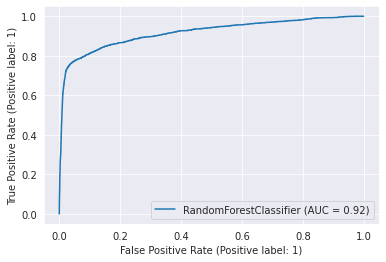

In [167]:
# roc curve 

plot_roc_curve(model_rf_smote,X_test_final,y_test_final)

### 7.2 Testing the Unseen Test data on Random Forest - ADASYN:  

In [153]:
y_pred_rf_ada = model_rf_ada.predict(X_test_final)

print("Recall Score: ", recall_score(y_test_final,y_pred_rf_ada))

print('-'*30)

print(confusion_matrix(y_test_final,y_pred_rf_ada))

Recall Score:  0.7631701631701632
------------------------------
[[532050  21524]
 [   508   1637]]


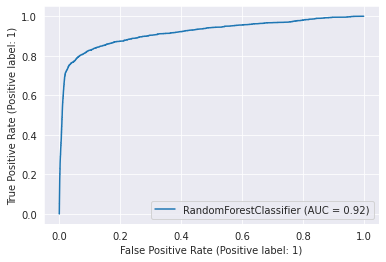

In [166]:
# roc curve 

plot_roc_curve(model_rf_ada,X_test_final,y_test_final)

### 7.3 Testing the Unseen Test data on Decision Tree - SMOTE :

In [154]:
y_pred_dt_smote = model_dt_smote.predict(X_test_final)

print("Recall Score: ", recall_score(y_test_final,y_pred_dt_smote))

print('-'*30)

print(confusion_matrix(y_test_final,y_pred_dt_smote))

Recall Score:  0.7794871794871795
------------------------------
[[519366  34208]
 [   473   1672]]


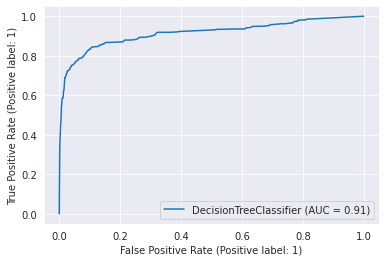

In [168]:
# roc curve 

plot_roc_curve(model_dt_smote,X_test_final,y_test_final)

### 7.4 Testing the Unseen Test data on Decision Tree - ADASYN :     

In [169]:
y_pred_dt_ada = model_dt_ada.predict(X_test_final)

print("Recall Score: ", recall_score(y_test_final,y_pred_dt_ada))

print('-'*30)

print(confusion_matrix(y_test_final,y_pred_dt_ada))

Recall Score:  0.737995337995338
------------------------------
[[518714  34860]
 [   562   1583]]


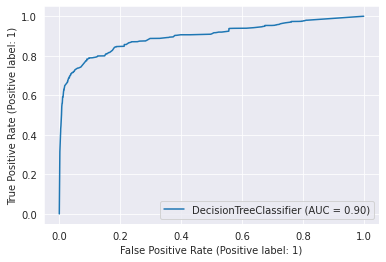

In [171]:
# roc curve 

plot_roc_curve(model_dt_ada,X_test_final,y_test_final)

### **Conclusion** : 

* Out of all the 4 models we tested , the **Random Forest ADASYN** comes out to be most preferrable model as it has the **recall score**  of 0.76 and  **AUC Score** of 0.92 which is highest among 4 models.
(As our requirement was High Recall and low false positive rate  for  buidling a Ml model capable of detecting Fraudulent Transctions.)

* Hence  **Random Forest - ADASYN** is the best fit model 

In [183]:
# Creating a dataframe to compare actual and predicted values 

y_pred_final = pd.Series(y_pred_rf_ada)

df_pred_output = pd.concat([X_test_final,y_test_final,y_pred_final],axis=1)

df_pred_output.rename(columns={0:'y_pred'},inplace= True)

df_pred_output.head()

,amt,gender,city_pop,Age,Day_of_week,Month,Dist,is_fraud,y_pred
0,1.050822,0,12.717389,52,6,6,24.7565,0,0
1,3.395850,1,5.710427,30,6,6,99.0198,0,0
2,3.720378,1,10.448599,50,6,6,73.3674,0,0
3,4.095178,0,10.910843,33,6,6,27.7547,0,0
4,1.160021,0,7.026427,65,6,6,105.8054,0,0


In [186]:
# lets extract only Fraud Transactions from this Unseen Test dataset 

df_pred_output.Month.value_counts()

12    139538
8      88759
7      85848
11     72635
9      69533
10     69348
6      30058
Name: Month, dtype: int64

In [188]:
df_fraud = df_pred_output[df_pred_output['is_fraud']==1]

df_fraud.head()

,amt,gender,city_pop,Age,Day_of_week,Month,Dist,is_fraud,y_pred
1685,3.212455,1,3.135494,51,6,6,80.1618,1,0
1767,6.659960,0,7.174724,62,6,6,12.7801,1,1
1781,6.430252,0,7.174724,62,6,6,24.6456,1,1
1784,6.982575,0,11.175142,26,6,6,98.7376,1,1
1857,6.736552,1,3.135494,51,6,6,60.5244,1,1


## **STEP 8  Cost Benefit Analysis:**

The Cost Benefit Analysis is done on the complete dataset to analyse the business impact and present them to relevant business stakeholders.

In [172]:
# Let us merge the train and test dataset to form the complete dataset

df_final = pd.concat([df_train,df_test],axis=0)

df_final.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### Let us take a look at what you need to do in order to perform the cost-benefit analysis step by step:

**Part I: Analyse the dataset and find the following figures:**

1. Average number of transactions per month 
2. Average number of fraudulent transactions per month
3. Average amount per fraudulent transaction 

In [175]:
# Total number of Transactions can be found by checking the shape of the dataset 
# Avg Transactions per month can be found by dividing it by 24 (since the dataset is of 24 months from Jan 2019 to Dec 2020)

Avg_Trans_Pm = df_final.shape[0]//24 

print("1. Average Number of Transactions per month are :",Avg_Trans_Pm)

1. Average Number of Transactions per month are : 77183


In [174]:
# Checking Fraudulent Transactions 

df_final[df_final['is_fraud']==1]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517197,517197,2020-12-22 22:05:48,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,35b0297dd026d2e9a75d024a5dec7955,1387749948,34.573471,-89.911011,1
517274,517274,2020-12-22 22:18:07,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,da7f67d7375f10a054a3d919448c45dd,1387750687,34.091227,-90.390612,1
517341,517341,2020-12-22 22:31:48,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,25b076c7bcd70f272c1c5326bb234f4b,1387751508,34.628434,-90.284780,1
517529,517529,2020-12-22 23:06:03,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,2df7d894868fbc99ec1d8b055585fc9d,1387753563,34.746063,-90.401093,1


There a Total of 9651 Fraudulent Transactions spread across 24 months.

In [176]:
# Average Fraudulent Transactions 

Avg_Fraud_Trans_Pm = df_final[df_final['is_fraud']==1].shape[0]//24

print("2. Average Number of Fraudulent Transactions per month are :",Avg_Fraud_Trans_Pm)

2. Average Number of Fraudulent Transactions per month are : 402


In [177]:
# Average amount Per Fraudulent Transaction 

Avg_Fraud_Amt = df_final[df_final['is_fraud']==1].amt.sum()//df_final[df_final['is_fraud']==1].shape[0]

In [179]:
print("3. Average Amount Per Fraudulent Transactions is : ",Avg_Fraud_Amt)

3. Average Amount Per Fraudulent Transactions is :  530.0


**Part II: Compare the cost incurred per month by the bank before and after the model deployment:** 


* Cost incurred per month before the model was deployed = Average amount per fraudulent transaction * Average number of fraudulent transactions per month.

* Cost incurred per month after the model is built and deployed:
 

Let TF be the average number of transactions per month detected as fraudulent by the model and let the cost of providing customer executive support per fraudulent transaction detected by the model = $1.5

  * Total cost of providing customer support per month for  fraudulent transactions detected by the model = 1.5 * TF.

Let FN be the average number of transactions per month that are fraudulent but not detected by the model 

  * Cost incurred due to these fraudulent transactions left undetected by the model = Average amount per fraudulent transaction * FN
  * Therefore, the cost incurred per month after the model is built and deployed = 1.5*TF + Average amount per fraudulent transaction * FN
  * Final savings = Cost incurred before - Cost incurred after.
 



 

In [180]:
# Calculating the cost incurred per month before the model was deployed 

Cost_incurred_before = Avg_Fraud_Amt*Avg_Fraud_Trans_Pm

Cost_incurred_before



213060.0

In [189]:
# let TF be the average number of transactions per month detected as fraudulent by the model 

TF = df_fraud['y_pred'].sum()//7 # Since the Test dataset  has 7 months 
TF

233

In [190]:
print("Total cost of providing customer support per month for fraudulent transactions detected by the model =",TF*1.5)

Total cost of providing customer support per month for fraudulent transactions detected by the model = 349.5


In [191]:
# Let FN be the average number of transactions per month that are fraudulent but not detected by the model

FN= df_fraud[df_fraud['y_pred']==0].is_fraud.sum()//7

FN

72

In [192]:
print("Cost incurred due to these fraudulent transactions left undetected by the model =",FN*Avg_Fraud_Amt)

Cost incurred due to these fraudulent transactions left undetected by the model = 38160.0


In [193]:
#  cost incurred per month after the model is built and deployed

Cost_incurred_after = TF*1.5+(FN*Avg_Fraud_Amt)

Cost_incurred_after

38509.5

In [194]:
# Final savings = Cost incurred before - Cost incurred after

Final_Savings = int(Cost_incurred_before-Cost_incurred_after)

print("Final Savings After Deploying the model = $",Final_Savings)


Final Savings After Deploying the model = $ 174550
